### TensorFlow Neural Network

Problem: Is an avocado __conventional__ or __organic__?

### Sections <a class="anchor" id="sections"></a>

- [1. Getting started](#section1)
    - [1.1 Outlier detection](#section1.1)
- [2. Data preprocessing](#section2)
    - [2.1 Encoding](#section2.1)
    - [2.2 Integer encoding](#section2.2)
    - [2.3 One-hot encoding](#section2.3)
    - [2.4 Label encoding](#section2.4)
    - [2.5 Standardise features](#section2.5)
    - [2.6 Train, test split](#section2.6)
- [3. Train model](#section3)
- [4. Results](#section3)

### 1. Getting Started <a class="anchor" id="section1"></a>

`pandas.DataFrame.drop`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

# Display all columns
pd.set_option('display.max_columns', None)

# Disables unnecessary tensorflow logs
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [2]:
df=pd.read_csv('data/data.csv')
display(df.head())
print('> DataFrame shape:', df.shape)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


> DataFrame shape: (18249, 14)


In [3]:
# Removes the first column - 'Unnamed: 0'
df.drop(df.columns[0], axis=1, inplace=True)
display(df.head())
print('> DataFrame shape:', df.shape)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


> DataFrame shape: (18249, 13)


#### 1.1 Outlier detection <a class="anchor" id="section1.1"></a>

`pandas.DataFrame.dtypes` `matplotlib.pyplot.figure` `matplotlib.pyplot.subplot` `matplotlib.pyplot.boxplot` `matplotlib.pyplot.title`

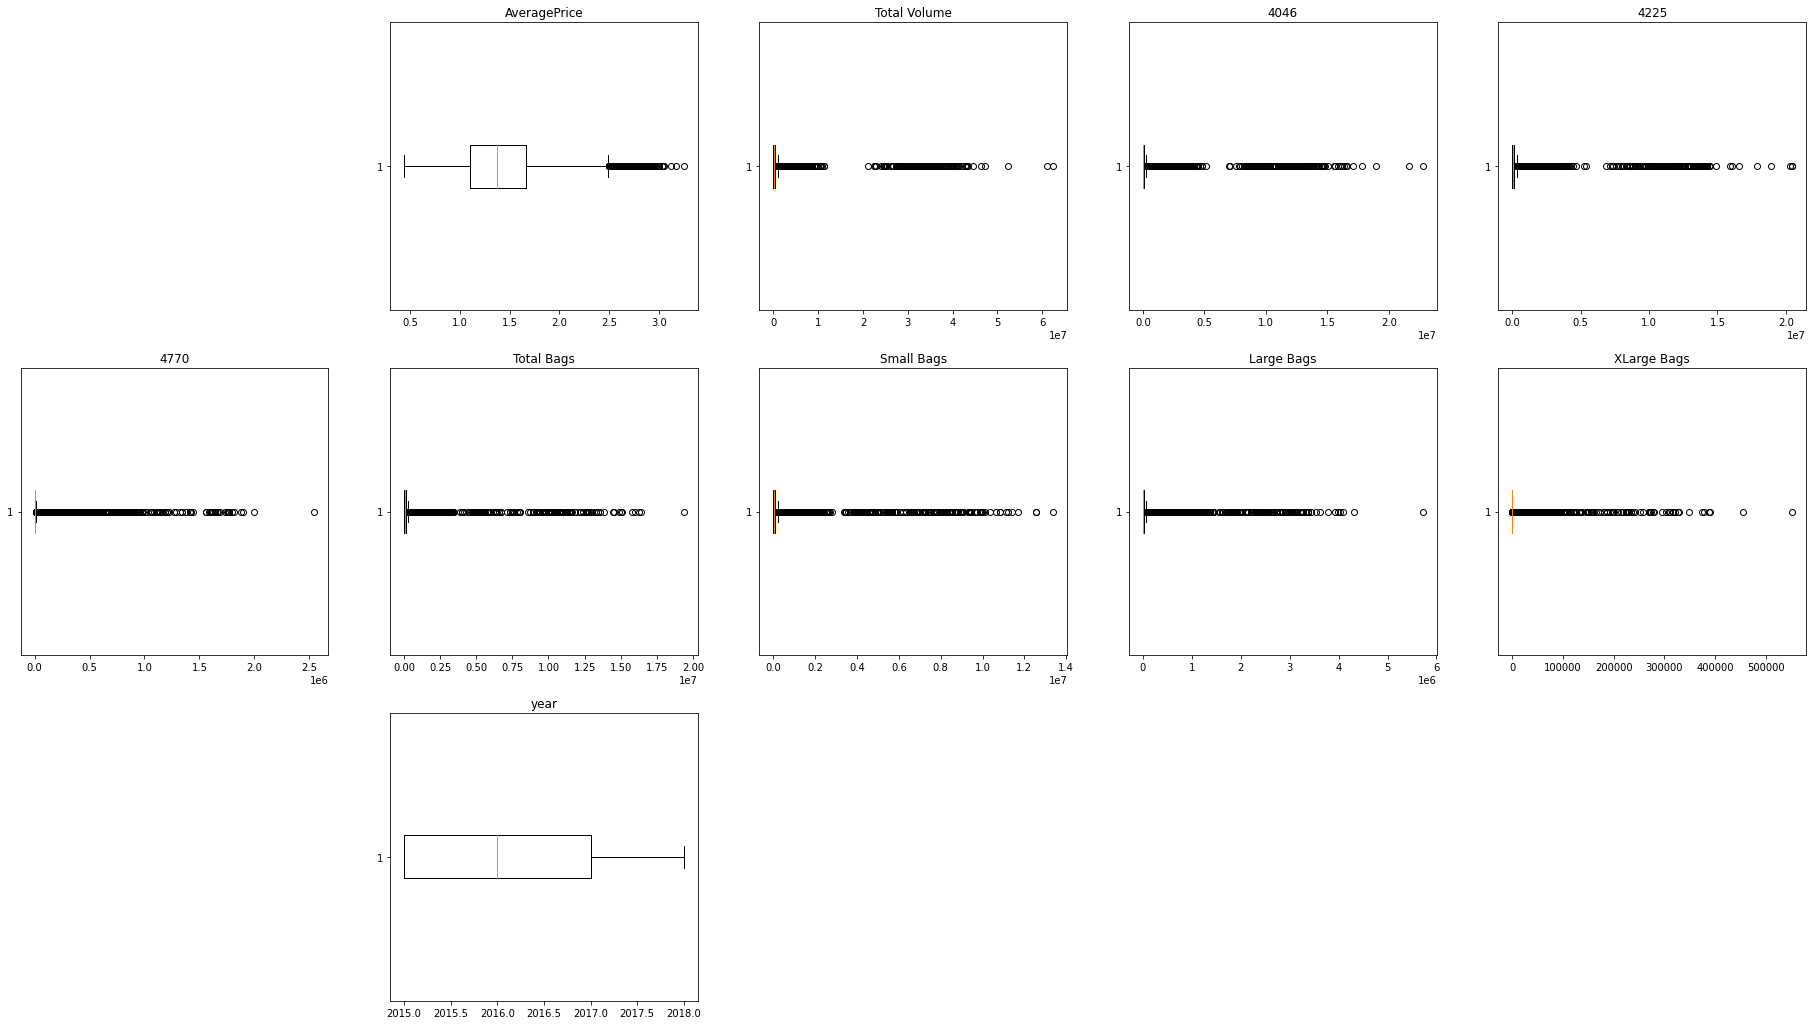

In [4]:
# Creates a new figure
plt.figure(figsize=(32,18))

for i in range(len(df.columns)):
    if df.dtypes[i] != 'object':
        # Builds a 3x5 grid subplot, index: i+1
        plt.subplot(3, 5, i+1)
        plt.boxplot(df[df.columns[i]], vert=False)
        plt.title(df.columns[i])  
plt.show()

### 2. Data preprocessing<a class="anchor" id="section2"></a>
`pandas.DataFrame.isna`

In [5]:
# Searches each column for null values
print(df.isna().sum())

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64


#### 2.1 Encoding<a class="anchor" id="section2.1"></a>

`integer encoding` `one-hot encoding`

#### Categorical features

Categorical features are variables that contain label values rather than numeric values. Categorical variables are often called `nominal`. Each value represents a different category.

The problem with categorical data? 
- Many machine learning algorithms cannot operate on label data directly. They require all input variables & output variables to be numeric. Thus, categorical data __must__ be converted to a numerical form.

In [6]:
# Define categorical columns / features
categoricalColumns = ['type', 'region']

# Function
def uniqueColumnValues(dataframe, columnNames):
    '''Returns a dictionary mapping each column to a list of its unique values'''
    return {column: list(dataframe[column].unique()) for column in columnNames}

print(uniqueColumnValues(df, categoricalColumns))

{'type': ['conventional', 'organic'], 'region': ['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston', 'BuffaloRochester', 'California', 'Charlotte', 'Chicago', 'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver', 'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton', 'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville', 'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale', 'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork', 'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia', 'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland', 'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento', 'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina', 'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse', 'Tampa', 'TotalUS', 'West', 'WestTexNewMexico']}


#### 2.2 Integer encoding<a class="anchor" id="section2.2"></a>
Date is an ordinal feature.

Each unique category value (i.e. date) is assigned an integer value. These integer values have a natural ordered relationship between each other (e.g. the lower the number - the earlier the date) & machine learning algorithms may be able to understand & harness this relationship.

In [7]:
# Define an ordered list of values
dateOrdering = sorted(df['Date'].unique())

# Number of unique values in Date column
print('Number of unique dates found in list: \n%s' %len(dateOrdering))
print('> First five dates of ordered list:\n%s' %dateOrdering[:5])
print('> Last five dates of ordered list:\n%s' %dateOrdering[-5:])

Number of unique dates found in list: 
169
> First five dates of ordered list:
['2015-01-04', '2015-01-11', '2015-01-18', '2015-01-25', '2015-02-01']
> Last five dates of ordered list:
['2018-02-25', '2018-03-04', '2018-03-11', '2018-03-18', '2018-03-25']


In [8]:
# Python list index method - example I
print('> Date index number: %s' %dateOrdering.index('2015-01-04'))
print(dateOrdering[0],'\n')

# Python list index method - example II
print('> Date index number: %s' %dateOrdering.index('2018-03-25'))
print(dateOrdering[168])

> Date index number: 0
2015-01-04 

> Date index number: 168
2018-03-25


In [9]:
# Funciton
def integerEncode(dataframe, columnName, orderedList):
    '''Maps each value in a column with a number corresponding to its order in ordered list'''
    dataframe = dataframe.copy()
    dataframe[columnName] = dataframe[columnName].apply(lambda x: orderedList.index(x))
    return dataframe

# Apply function to original DataFrame & save as new DataFrame 'dfEncoded'
dfClean = integerEncode(df, 'Date', dateOrdering)

# Display original & encoded DataFrames
display(df.head(), dfClean.head())

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,50,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,49,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,48,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,47,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [10]:
# For reference: DataFrame.loc[4]
print('Date index number: %s' %dateOrdering.index('2015-11-29'))

Date index number: 47


#### 2.3 One-hot encoding<a class="anchor" id="section2.3"></a>

`pandas.get_dummies`

Region is a nominal feature.

For categorical variables where no such ordinal relationship exists, integer encoding is not enough & will result in poor model performance.

In this case, one-hot encoding can be applied to the integer representation. Here, the integer encoded variable is removed & a new binary variable (known as a dummy variable) is added for each unique integer value.

In [11]:
# Function
def oneHotEncode(dataframe, columnName):
    '''Takes each value in the column & returns a matrix of 0's & 1's where 1 
       corresponds to the presence of that value'''   
    dataframe = dataframe.copy()
    dummies = pd.get_dummies(dataframe[columnName])
    
    dataframe = pd.concat([dataframe, dummies], axis=1)
    dataframe.drop(columnName, axis=1, inplace=True)
    return dataframe

# Apply function to original DataFrame & save as new DataFrame 'dfOneHot'
dfClean = oneHotEncode(dfClean, 'region')

# Display original & encoded DataFrames
display(df.head(), dfClean.head())

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Albany,Atlanta,BaltimoreWashington,Boise,Boston,BuffaloRochester,California,Charlotte,Chicago,CincinnatiDayton,Columbus,DallasFtWorth,Denver,Detroit,GrandRapids,GreatLakes,HarrisburgScranton,HartfordSpringfield,Houston,Indianapolis,Jacksonville,LasVegas,LosAngeles,Louisville,MiamiFtLauderdale,Midsouth,Nashville,NewOrleansMobile,NewYork,Northeast,NorthernNewEngland,Orlando,Philadelphia,PhoenixTucson,Pittsburgh,Plains,Portland,RaleighGreensboro,RichmondNorfolk,Roanoke,Sacramento,SanDiego,SanFrancisco,Seattle,SouthCarolina,SouthCentral,Southeast,Spokane,StLouis,Syracuse,Tampa,TotalUS,West,WestTexNewMexico
0,51,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,50,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,49,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,48,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,47,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### 2.4 Encode labels<a class="anchor" id="section2.4"></a>

`sklearn.preprocessing.LabelEncoder` `.fit_transform(y)`

In [12]:
# Define transformer
label_encoder = LabelEncoder()

# Fits label encoder to label column to return encoded labels
dfClean['type']=(label_encoder.fit_transform(dfClean['type']))

# Display original & encoded DataFrames
display(df.head(5), dfClean.head(5), df.tail(5), dfClean.tail(5))

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Albany,Atlanta,BaltimoreWashington,Boise,Boston,BuffaloRochester,California,Charlotte,Chicago,CincinnatiDayton,Columbus,DallasFtWorth,Denver,Detroit,GrandRapids,GreatLakes,HarrisburgScranton,HartfordSpringfield,Houston,Indianapolis,Jacksonville,LasVegas,LosAngeles,Louisville,MiamiFtLauderdale,Midsouth,Nashville,NewOrleansMobile,NewYork,Northeast,NorthernNewEngland,Orlando,Philadelphia,PhoenixTucson,Pittsburgh,Plains,Portland,RaleighGreensboro,RichmondNorfolk,Roanoke,Sacramento,SanDiego,SanFrancisco,Seattle,SouthCarolina,SouthCentral,Southeast,Spokane,StLouis,Syracuse,Tampa,TotalUS,West,WestTexNewMexico
0,51,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,50,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,49,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,48,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,47,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Albany,Atlanta,BaltimoreWashington,Boise,Boston,BuffaloRochester,California,Charlotte,Chicago,CincinnatiDayton,Columbus,DallasFtWorth,Denver,Detroit,GrandRapids,GreatLakes,HarrisburgScranton,HartfordSpringfield,Houston,Indianapolis,Jacksonville,LasVegas,LosAngeles,Louisville,MiamiFtLauderdale,Midsouth,Nashville,NewOrleansMobile,NewYork,Northeast,NorthernNewEngland,Orlando,Philadelphia,PhoenixTucson,Pittsburgh,Plains,Portland,RaleighGreensboro,RichmondNorfolk,Roanoke,Sacramento,SanDiego,SanFrancisco,Seattle,SouthCarolina,SouthCentral,Southeast,Spokane,StLouis,Syracuse,Tampa,TotalUS,West,WestTexNewMexico
18244,161,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
18245,160,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
18246,159,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
18247,158,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
18248,157,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,1,2018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


#### 2.5 Standardise features<a class="anchor" id="section2.5"></a>

- `sklearn.preprocessing.StandardScaler` Standardises each feature by removing the mean & scaling to unit variance.

Standardisation of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean & unit variance).


- `fit_transform(X)` Fits scalar to data, & then transforms it.

In [13]:
# Isolate the labels
y = dfClean['type']

# Isolate the features
X = dfClean.drop('type', axis=1)

# View both
display(X.head(), y.head())

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Albany,Atlanta,BaltimoreWashington,Boise,Boston,BuffaloRochester,California,Charlotte,Chicago,CincinnatiDayton,Columbus,DallasFtWorth,Denver,Detroit,GrandRapids,GreatLakes,HarrisburgScranton,HartfordSpringfield,Houston,Indianapolis,Jacksonville,LasVegas,LosAngeles,Louisville,MiamiFtLauderdale,Midsouth,Nashville,NewOrleansMobile,NewYork,Northeast,NorthernNewEngland,Orlando,Philadelphia,PhoenixTucson,Pittsburgh,Plains,Portland,RaleighGreensboro,RichmondNorfolk,Roanoke,Sacramento,SanDiego,SanFrancisco,Seattle,SouthCarolina,SouthCentral,Southeast,Spokane,StLouis,Syracuse,Tampa,TotalUS,West,WestTexNewMexico
0,51,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,50,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,49,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,48,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,47,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


0    0
1    0
2    0
3    0
4    0
Name: type, dtype: int64

In [14]:
# Define scaler
scaler = StandardScaler()

# Fits scaler to data label to transform features
X = scaler.fit_transform(X)

#### 2.6 Train, test split<a class="anchor" id="section2.6"></a>

`sklearn.model_selection.train_test_split` 

In [15]:
# Split arrays / matrices into random train & test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

# Subsets shapes
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(12774, 65) (12774,) (5475, 65) (5475,)


### 3. Train Model<a class="anchor" id="section3"></a>

- (i.e. Build a TensorFlow.Keras neural network)

`tf.keras.Input` `tf.keras.layers.Dense` `tf.keras.Model`

In [16]:
# Instantiates a Keras tensor
inputs = tf.keras.Input(65,) # 65 Features

# First hidden layer (Regular densely-connected NN layer)
x = tf.keras.layers.Dense(64, activation='relu')(inputs) # 64 activations

# Second hidden layer
x = tf.keras.layers.Dense(64, activation='relu')(x)

# Outputs layer
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x) # 1 = probability estimate for the positive example

In [17]:
# Groups layers into an object (i.e. the model) with training & inference features
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [18]:
# Configure / complie the model for training
model.compile(
              optimizer = 'adam',
              loss = 'mse', # Computes the mean squared error between labels & predictions
              metrics = ['accuracy'] # Calculates how often predictions equal labels
             )

In [19]:
# Number of samples for gradient update
batchSize = 64

# Number of epochs to train the model
epochsNumber = 70

# Trains the model for a fixed number of epochs (i.e. iterations on a dataset)
history = model.fit(
                    x = X_train, # Input data
                    y = y_train, # Ouput data
                    validation_split = 0.2, # Fraction of the training data to be used as validation data
                    batch_size = batchSize, 
                    epochs = epochsNumber,
                    callbacks = [tf.keras.callbacks.ReduceLROnPlateau()], # List of callbacks to apply during training
                    verbose = 1 # Verbosity mode
                    )

Epoch 1/70
160/160 [==============================] - 7s 15ms/step - loss: 0.1292 - accuracy: 0.8329 - val_loss: 0.0754 - val_accuracy: 0.9123
Epoch 2/70
160/160 [==============================] - 1s 5ms/step - loss: 0.0667 - accuracy: 0.9166 - val_loss: 0.0556 - val_accuracy: 0.9335
Epoch 3/70
160/160 [==============================] - 1s 5ms/step - loss: 0.0495 - accuracy: 0.9388 - val_loss: 0.0398 - val_accuracy: 0.9569
Epoch 4/70
160/160 [==============================] - 1s 5ms/step - loss: 0.0336 - accuracy: 0.9619 - val_loss: 0.0303 - val_accuracy: 0.9659
Epoch 5/70
160/160 [==============================] - 1s 7ms/step - loss: 0.0236 - accuracy: 0.9736 - val_loss: 0.0204 - val_accuracy: 0.9808
Epoch 6/70
160/160 [==============================] - 1s 4ms/step - loss: 0.0182 - accuracy: 0.9816 - val_loss: 0.0141 - val_accuracy: 0.9898
Epoch 7/70
160/160 [==============================] - 1s 4ms/step - loss: 0.0133 - accuracy: 0.9865 - val_loss: 0.0141 - val_accuracy: 0.9836
Epoch

### 4. Results<a class="anchor" id="section4"></a>

`tf.keras.callbacks.History` `numpy.argmin` `model.evaluate()`

note: a history field is a dictionary which helds different training metrics spanned across every training epoch

In [20]:
# Callback that records events into a History object
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


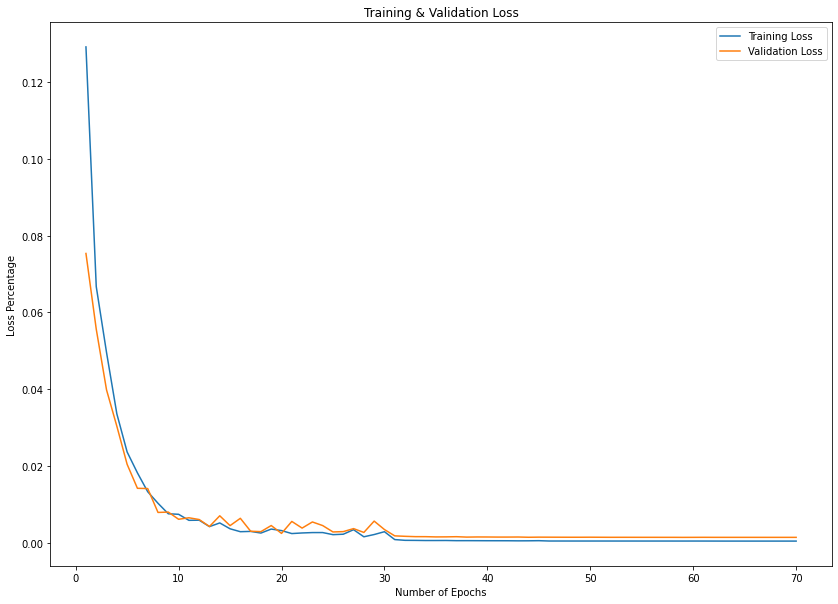

In [21]:
plt.figure(figsize=(14, 10))

# x 
epochsRange = range(1, epochsNumber + 1)

# y: history object 
trainLoss = history.history['loss']

# y: history object 
valLoss = history.history['val_loss']

plt.plot(epochsRange, trainLoss, label = 'Training Loss')
plt.plot(epochsRange, valLoss, label = 'Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss Percentage')
plt.legend()
plt.show()

In [22]:
# Epoch number for the lowest vlidation loss
print(np.argmin(valLoss) + 1,'\n')

# Evaluate the model
print(model.evaluate(X_test, y_test))

59 

172/172 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 0.9993
[0.0010754321701824665, 0.999269425868988]
